In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[  18.91244055   21.89991518   23.10268177   25.37235939   25.40890394
   26.17396648   26.47557767   27.48672267   27.9946682    28.17489927
   29.48006179   29.60108596   30.34870678   30.58936519   30.84158361
   30.960828     31.30769846   31.35593629   31.44480599   31.49630059
   31.6415889    31.67298031   31.68697296   31.79791178   31.82935433
   32.13262664   32.2849747    32.48074908   32.51008455   32.76551181
   33.76574091   33.92236041   34.17401947   34.31034963   34.44205239
   34.72206908   35.04005413   35.18184224   35.20784321   35.99756882
   36.15656134   36.16064821   36.63472543   36.79134493   36.86965468
   36.89457142   36.92660723   36.97717716   37.04407185   37.20781042
   37.42236441   37.47335167   37.56376384   37.7418592    38.04714858
   38.09413443   38.18668231   38.21159905   38.49877718   38.64955359
   38.83451753   39.05520865   39.22627676   39.457436     39.48235274
   39.61761504   39.96716129   40.12164508   40.3117242    40.35704893
   40.

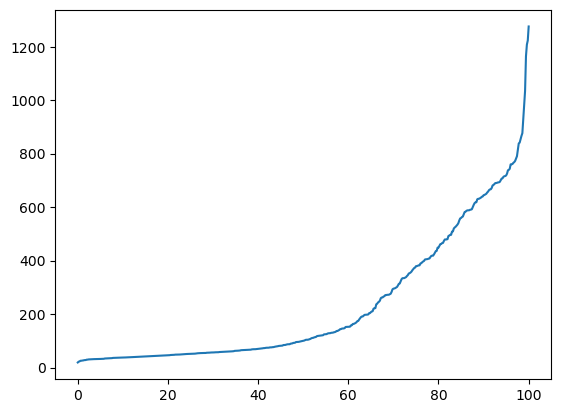

In [25]:
df = pd.read_csv("..\\Data\\Discharge_670.csv", header=0)
df = df.dropna(how="all")

data = np.array([])
for column in df.columns[1:]:
    data = np.append(data, df[column].values)

df = pd.DataFrame(data, columns=["Discharge"])
date = pd.date_range(start="1965-01-01", periods=len(data), freq="D")
df["Date"] = date
df_monthly = df.groupby(df["Date"].dt.to_period("M")).mean()

data = np.sort(df_monthly["Discharge"].values)
data = data[data > 0]
data = np.array(data, dtype=float)
x = np.linspace(0, 100, len(data))
print(data)

plt.plot(x, data)

In [24]:
d10 = np.percentile(data, 10)
d50 = np.percentile(data, 50)
d90 = np.percentile(data, 90)
print(f'D10: {d10} m^3/s, D50: {d50} m^3/s, D90: {d90} m^3/s')


D10: 37.42236441398504 m^3/s, D50: 100.05138576676602 m^3/s, D90: 644.5248477582297 m^3/s


[9.99934089e-01 9.97890852e-01 9.84313209e-01 9.37384656e-01
 8.75428421e-01 8.07803849e-01 7.39520169e-01 6.76707092e-01
 6.30042183e-01 5.99129976e-01 5.71183760e-01 5.47719483e-01
 5.23266544e-01 5.03559188e-01 4.86949644e-01 4.72515160e-01
 4.58014764e-01 4.47864487e-01 4.36198260e-01 4.25059320e-01
 4.16886370e-01 4.04626944e-01 3.97969945e-01 3.89599262e-01
 3.83008173e-01 3.76878460e-01 3.71539678e-01 3.66860005e-01
 3.61982600e-01 3.56116530e-01 3.52491432e-01 3.47548115e-01
 3.43329818e-01 3.39572897e-01 3.35486422e-01 3.32520432e-01
 3.29027155e-01 3.24413393e-01 3.20854205e-01 3.16965463e-01
 3.12878988e-01 3.09451621e-01 3.05299235e-01 3.02399156e-01
 2.98839968e-01 2.93896652e-01 2.89480622e-01 2.86053256e-01
 2.83219088e-01 2.80187187e-01 2.74980227e-01 2.71618771e-01
 2.67993673e-01 2.63445821e-01 2.59359346e-01 2.55470604e-01
 2.51647772e-01 2.47824941e-01 2.43079357e-01 2.39388347e-01
 2.34774585e-01 2.30688110e-01 2.27458476e-01 2.23635645e-01
 2.19549170e-01 2.175718

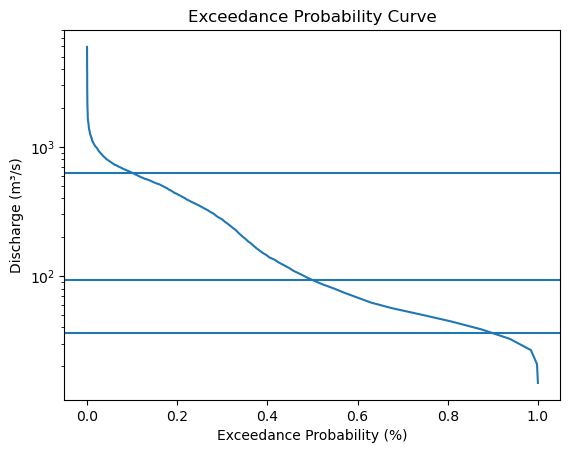

In [47]:
# Load time series
discharge = df['Discharge'].values
discharge = discharge[discharge > 0]
values = np.linspace(discharge.min(), discharge.max(), 1000)
exceedance = np.array([len(discharge[discharge > v]) for v in values]) / len(discharge)
print(exceedance)
plt.plot(exceedance, values)
plt.ylabel('Discharge (m³/s)')
plt.xlabel('Exceedance Probability (%)')
plt.title('Exceedance Probability Curve')
plt.yscale('log')

d10 = np.percentile(discharge, 10)
d50 = np.percentile(discharge, 50)
d90 = np.percentile(discharge, 90)

plt.axhline(d10)
plt.axhline(d50)
plt.axhline(d90)

for d in [d10, d50, d90]:
    print(f'D{int(100 - (len(discharge[discharge > d]) / len(discharge) * 100))}: {d:.2f} m^3/s')

In [53]:
n = 10
Q = d50 / n
H = 175
if Q < 10:
    C_F2 = 282000 * (Q * H**0.5)**0.11 * n
    print(f'C_F2: {C_F2:.2f} pounds')
elif 10 <= Q < 100:
    C_F3 = 50000 * (Q * H**0.5)**0.52 * n
    print(f'C_F3: {C_F3:.2f} pounds')

C_F2: 4789003.97 pounds
